<a href="https://colab.research.google.com/github/Haseeb55859/Artificial-intelligence-AI-/blob/main/NOTEBOOK/Phase2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Phase 2: Preprocessing & Generators

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Step 0 — Diagnostic: confirm dataset paths in Drive**

In [4]:
# STEP 0 — Confirm dataset folder and splits exist
import os

BASE_DIR = '/content/drive/MyDrive/datasets/skin_cancer9'  # EDIT if your dataset is elsewhere

print("BASE_DIR:", BASE_DIR)
if not os.path.exists(BASE_DIR):
    print("ERROR: base directory not found. Please set BASE_DIR to the correct path.")
else:
    print("Top-level contents:", os.listdir(BASE_DIR))
    for root, dirs, files in os.walk(BASE_DIR):
        print(root, "->", len(dirs), "dirs,", len(files), "files")
        # show only a little to keep output short
        break


BASE_DIR: /content/drive/MyDrive/datasets/skin_cancer9
Top-level contents: ['train', 'test', 'val', 'manifest.csv']
/content/drive/MyDrive/datasets/skin_cancer9 -> 3 dirs, 1 files


**Step 1 — Imports & parameters**

In [5]:
# STEP 1 — imports and params
import os
import numpy as np
import random
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# --- Update these if needed ---
BASE_DIR   = '/content/drive/MyDrive/datasets/skin_cancer9'  # must contain train/, val/, test/
TRAIN_DIR  = os.path.join(BASE_DIR, 'train')
VAL_DIR    = os.path.join(BASE_DIR, 'val')
TEST_DIR   = os.path.join(BASE_DIR, 'test')

IMG_HEIGHT = 224
IMG_WIDTH  = 224
BATCH_SIZE = 32
SEED       = 42


**Step 2 — Create ImageDataGenerators (augmentation on train only)**

In [6]:
# STEP 2 — ImageDataGenerators
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest'
)

val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

print("ImageDataGenerators created.")


ImageDataGenerators created.


**Step 3 — Create generators from directory**

In [7]:
# STEP 3 — create flow_from_directory generators
# NOTE: for multi-class use class_mode='categorical'
train_generator = train_datagen.flow_from_directory(
    TRAIN_DIR,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=True,
    seed=SEED
)

val_generator = val_datagen.flow_from_directory(
    VAL_DIR,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=False,
    seed=SEED
)

test_generator = test_datagen.flow_from_directory(
    TEST_DIR,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=False,
    seed=SEED
)


Found 1907 images belonging to 9 classes.
Found 332 images belonging to 9 classes.
Found 118 images belonging to 9 classes.


**Step 4 — Print generator info & class mapping**

In [8]:
# STEP 4 — basic info
print("Train images:", train_generator.samples, "Batches:", len(train_generator))
print("Val   images:", val_generator.samples, "Batches:", len(val_generator))
print("Test  images:", test_generator.samples, "Batches:", len(test_generator))

print("\nClass mapping (label index -> class name):")
inv_map = {v:k for k,v in train_generator.class_indices.items()}
for idx in sorted(inv_map):
    print(idx, "->", inv_map[idx])


Train images: 1907 Batches: 60
Val   images: 332 Batches: 11
Test  images: 118 Batches: 4

Class mapping (label index -> class name):
0 -> actinic keratosis
1 -> basal cell carcinoma
2 -> dermatofibroma
3 -> melanoma
4 -> nevus
5 -> pigmented benign keratosis
6 -> seborrheic keratosis
7 -> squamous cell carcinoma
8 -> vascular lesion


**Step 5 — Visual check: display a batch of augmented train images**

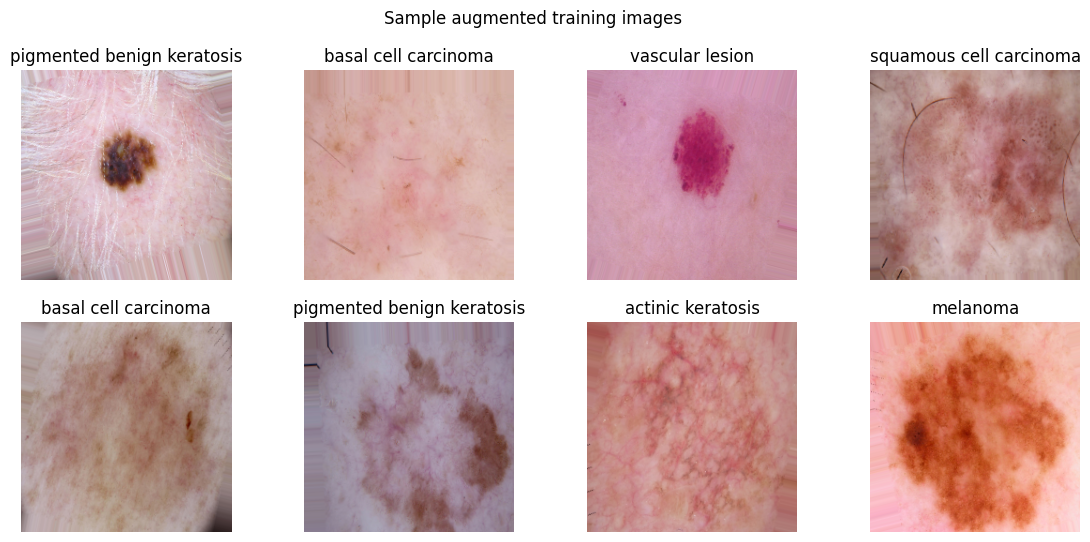

In [9]:
# STEP 5 — display N augmented images to verify
images, labels = next(train_generator)
N = min(8, images.shape[0])

# decode labels (one-hot -> index)
label_indices = [np.argmax(labels[i]) for i in range(N)]
inv_map = {v:k for k,v in train_generator.class_indices.items()}

plt.figure(figsize=(14,6))
for i in range(N):
    plt.subplot(2, 4, i+1)
    plt.imshow(images[i])
    plt.title(inv_map[label_indices[i]])
    plt.axis('off')
plt.suptitle("Sample augmented training images")
plt.show()
